In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/andhikaw789/Customer-Personality-Analysis/main/marketing_campaign.csv"
df = pd.read_csv(url, sep='\t')

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,...,7,0,0,0,0,0,0,3,11,1


In [16]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_Since_Days,Age,Total_Spend,Family_Size,Is_Parent
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,3,11,1,4708,68,1617,1,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,3,11,0,4158,71,27,3,1
2,4141,1965,Graduation,Married,71613.0,0,0,2013-08-21,26,426,...,0,0,3,11,0,4357,60,776,1,0
3,6182,1984,Graduation,Married,26646.0,1,0,2014-02-10,26,11,...,0,0,3,11,0,4184,41,53,2,1
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,3,11,0,4206,44,422,2,1


In [2]:
# Save to CSV format in your working directory
df.to_csv("customer_personality_analysis.csv", index=False)

In [17]:
df.shape

(2216, 34)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [15]:
# Count of missing values
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
Customer_Since_Days    0
Age                    0
Total_Spend            0
Family_Size            0
Is_Parent              0
dtype: int64

In [8]:
df['Education'].value_counts()

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

In [9]:
df['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [10]:
df = df.dropna(subset=['Income'])

In [12]:
from datetime import datetime

# Convert Dt_Customer to datetime with day first
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True)

# Create a new feature: days since becoming a customer
df['Customer_Since_Days'] = (datetime.now() - df['Dt_Customer']).dt.days


In [13]:
# Age
df['Age'] = 2025 - df['Year_Birth']

# Total Spending across all categories
spend_cols = ['MntWines', 'MntFruits', 'MntMeatProducts',
              'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df['Total_Spend'] = df[spend_cols].sum(axis=1)

# Family Size
df['Family_Size'] = 1 + df['Kidhome'] + df['Teenhome']

# Is Parent or Not
df['Is_Parent'] = ((df['Kidhome'] + df['Teenhome']) > 0).astype(int)


In [14]:
df['Marital_Status'] = df['Marital_Status'].replace({
    'Married': 'Married',
    'Together': 'Married',
    'Single': 'Single',
    'Divorced': 'Single',
    'Widow': 'Single',
    'Alone': 'Single',
    'Absurd': 'Single',
    'YOLO': 'Single'
})


In [25]:
# Remove unrealistic age values
df = df[(df['Age'] >= 18) & (df['Age'] <= 95)]


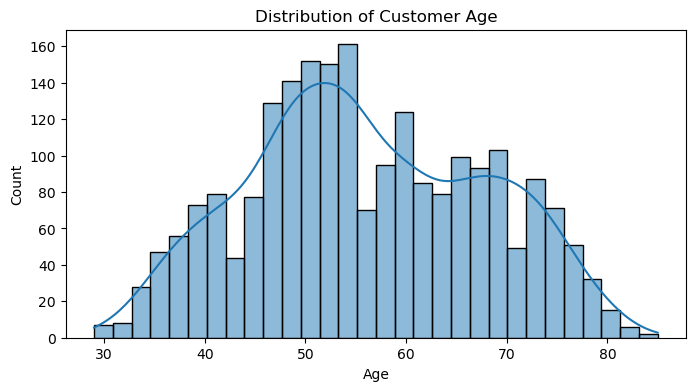

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,4))
sns.histplot(df['Age'], kde=True, bins=30)
plt.title('Distribution of Customer Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


#### What You See in the Chart
This is a bar graph showing: How many customers are in each age group

### What It Means
##### Most customers are between 35 to 70 years old.
- The tallest bars are around 50–55 years → most people are this age.
- These are your main customers.
##### Very few young customers (under 30).
- So young people don’t buy much from this company.
##### Some very old customers (like age 100+).
- These are probably mistakes in the data (wrong birth year like 1900).
- We will remove those incorrect rows.

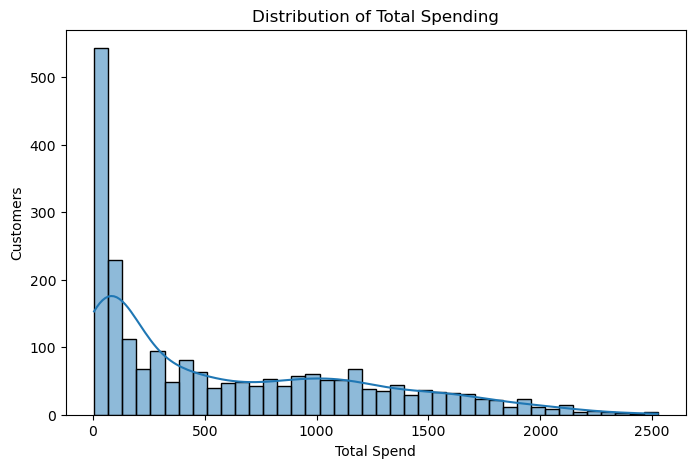

In [21]:
plt.figure(figsize=(8,5))
sns.histplot(df['Total_Spend'], kde=True, bins=40)
plt.title('Distribution of Total Spending')
plt.xlabel('Total Spend')
plt.ylabel('Customers')
plt.show()


### What the Chart Tells Us
X-axis = Total Spend
- This shows the amount of money spent by each customer.
- For example: 0, 500, 1000, 1500, ..., up to 2500.

Y-axis = Number of Customers
- This shows how many people spent that much money.

#### Easy Understanding:
1. Most customers spend very little
- The tallest bar is near 0–200 → That means over 500 customers spent less than 200.
- These are low-spending customers.
2. Very few customers spend a lot
- The bars get smaller as we move right (spending more).
- Only a few people spent more than 2000.
3. Spending is not equal
- Some people spend a lot, but most people spend very little.
- This is called a right-skewed distribution.

#### Conclusion:
- we should target high-spending customers — they bring in more money
- we might want to ignore the very low-spending group in campaigns.

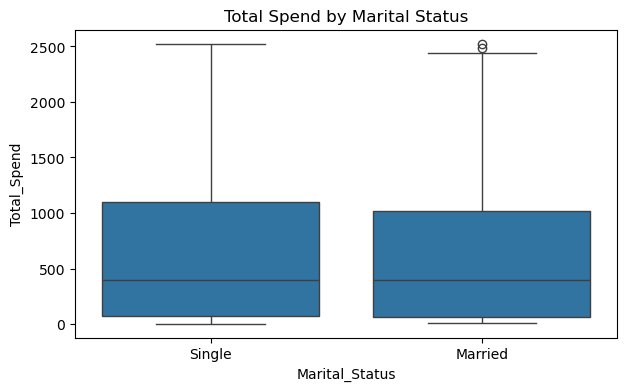

In [22]:
plt.figure(figsize=(7,4))
sns.boxplot(x='Marital_Status', y='Total_Spend', data=df)
plt.title('Total Spend by Marital Status')
plt.show()


### Total Spend by Marital Status
This is a boxplot. It compares how much Single vs. Married customers spend overall.

#### Simple Explanation of a Boxplot
- Middle line (dark bar) → the median (middle value of spending)
- Box (top and bottom) → the middle 50% of customers
- Lines (whiskers) → range of most customer values
- Dots above whiskers → outliers (customers who spend a lot more than others)

#### What This Chart Tells Us
X-axis = Marital Status
- You grouped customers into Single and Married.

Y-axis = Total Spend
- This shows how much money they spent in total.

1. Spending range is similar for both groups.
- Both have a wide range of spenders — from very low to very high.
2. Median (middle) spend is slightly higher for Single customers.
- So Singles spend a bit more on average.
3. More outliers in Married group.
- There are a few Married customers who spend a lot (dots above box).
- These might be very valuable customers.

#### Conclusion
- Target Single customers for consistent spend.
- Target high-value Married customers with premium offers.

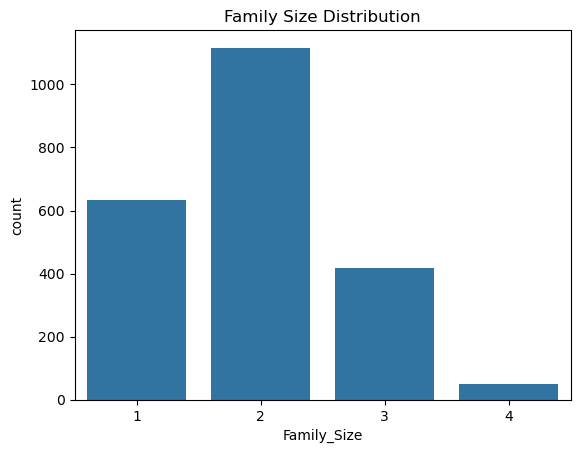

In [23]:
sns.countplot(x='Family_Size', data=df)
plt.title('Family Size Distribution')
plt.show()


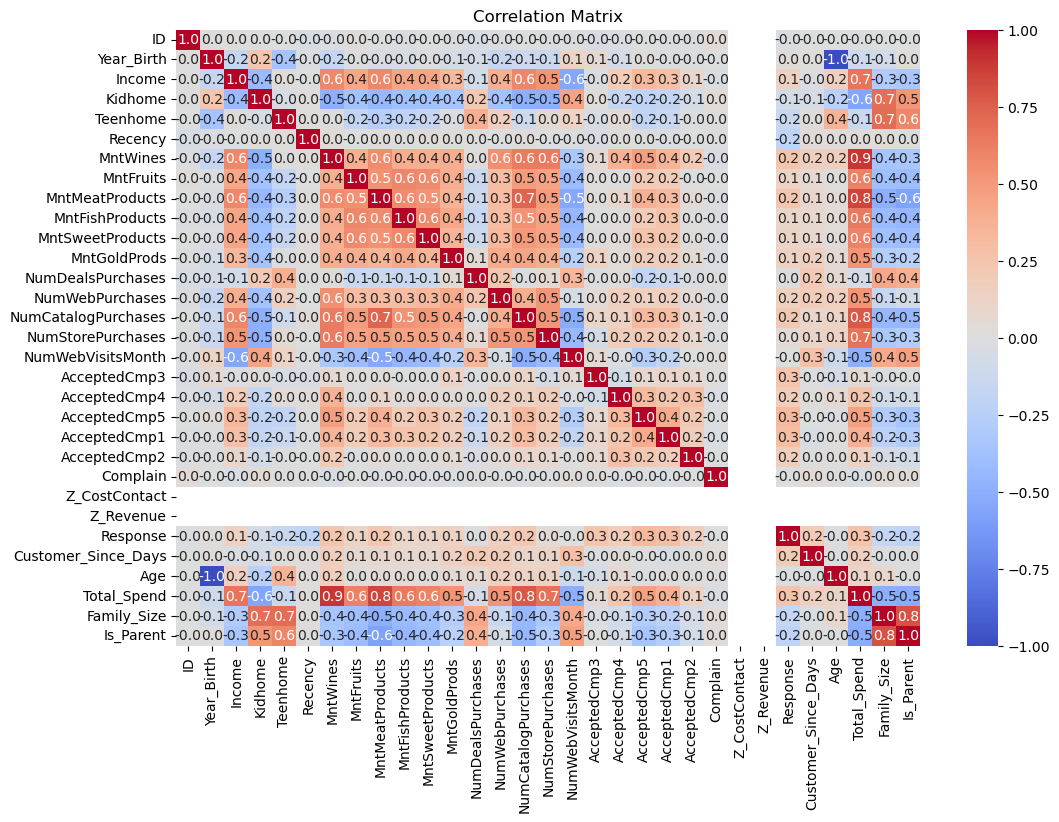

In [31]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.1f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Select Features for Clustering, Choose numerical features that define behavior:

In [32]:
features = df[[
    'Age', 'Income', 'Total_Spend',
    'Recency', 'NumWebPurchases', 'NumStorePurchases',
    'Family_Size', 'Is_Parent'
]]


In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


In [34]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)


C:\Users\Swastikpc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


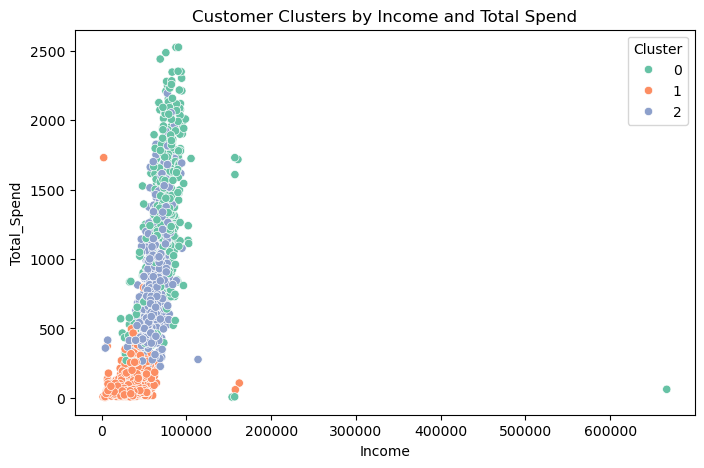

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Income', y='Total_Spend', hue='Cluster', palette='Set2')
plt.title('Customer Clusters by Income and Total Spend')
plt.show()


### Customer Clusters by Income and Total Spend
X-axis = Income
- How much money the customer earns.

Y-axis = Total_Spend
- How much money the customer has spent in all categories.

- Each dot = 1 customer
- Each color = 1 cluster/group

From our chart:
Cluster 0 = Green,
Cluster 1 = Red,
Cluster 2 = Blue

#### What the Clusters Show:
1. Cluster 0 (Green):
- Most customers are here
- Moderate income, moderate to high spending
- These could be your mainstream valuable customers

2. Cluster 1 (Red):
- Low income, low spenders
- These customers may not respond well to premium marketing
- Good for basic deals or cost-sensitive offers

3. Cluster 2 (Blue):
- High spending, also high income
- Some are extreme cases → maybe outliers
- Target these customers with premium products or loyalty programs

#### One Odd Point (Far right green dot):
- There’s 1 green dot with extremely high income (~600,000)
- This is likely a data error or rare customer
- May be worth removing or handling as outlier

In [36]:
df.groupby('Cluster')[['Income', 'Total_Spend', 'Age', 'Family_Size']].mean()


,Income,Total_Spend,Age,Family_Size
Cluster,,,,
0,74796.864662,1297.825188,57.124060,1.003759
1,34540.253425,101.094912,53.363992,2.274951
2,61468.109256,833.955994,59.458270,2.201821


#### This tells you:
- How much customers in each group earn
- How much they spend
- How old they are
- How big their family is
- How recently they bought something

In [38]:
def label_cluster(row):
    if row['Cluster'] == 0:
        return 'Engaged Regulars'
    elif row['Cluster'] == 1:
        return 'Low-Value Shoppers'
    else:
        return 'High-Value Premiums'

df['Segment'] = df.apply(label_cluster, axis=1)
